### Import Required Libraries and Set Up Environment Variables

In [6]:
!pip install fredapi

In [1]:
# Dependencies
import numpy as np
import requests
import time
import os
import pandas as pd
import json
from datetime import datetime
import matplotlib.pyplot as plt
from scipy import stats
from dotenv import load_dotenv
from fredapi import Fred


# from fredapi is a library that provides functionality to interact with the
# FRED (Federal Reserve Economic Data).
# import Fred imports the Fred class (or function) from the fredapi module.
# The fred variable can call methods defined in the Fred class to access
# economic data from the FRED API.


from fredapi import Fred

#### The US dollar (USD) to Mexican peson (MXN) foreign exchange rate.
#### Imagine you are an American going on a vacation to Mexico in three months.   
#### You can exchange your hard earned USD to MXN now or wait until you arrive
#### in Mexico. This project will help you to make an informed decision.  Better
#### yet, you can then learn to apply this methodology when you travel to other
#### foreign countries.

### Access Fred data using api_key

In [2]:
# Initializes a new object of the Fred class and assigns it to the variable
# fred.
# This api_key is used for authentication when making requests to the
# FRED (Federal Reserve Economic Data) API.
# Later need to store the api_key in .env
# FRED is a free and reliable government data source.

# Load environment variables from the .env file
load_dotenv()

# Get the API key from environment variables
api_key = os.getenv("API_KEY")
fred = Fred(api_key)


In [3]:
# Fetch data using fred.get_series().

# Use variable to store startd_date
start_date = "2010-01-01"

# Exchange rate: $1 equals Mexican pesos
exchange_rate = fred.get_series("DEXMXUS", start=start_date)

# U.S. fed rate
fed_rate = fred.get_series("FEDFUNDS", start=start_date)

# U.S. 90-days T-bill rate
t_bill_rate = fred.get_series('TB3MS', start=start_date)

# Mexico 90-days T-bill rate
mx_t_bill_rate = fred.get_series('INTGSTMXM193N', start=start_date)

# U.S. Real GDP, adjusted for inflation
us_gdp = fred.get_series('GDPC1', start=start_date)

# Mexico Real GDP, adjusted for inflation
mx_gdp = fred.get_series('NGDPRSAXDCMXQ', start=start_date)

# Oil prices - West Texas Intermediate (WTI) crude oil price in dollars per barrel
oil_price = fred.get_series('DCOILWTICO', start=start_date)



### Create master DataFrame containing all data.

In [4]:
# Select series from https://fred.stlouisfed.org/series

# Combine the time series into a DataFrame, aligning by date
data = pd.DataFrame({
    'Exchange Rate': exchange_rate,
    'Fed Rate': fed_rate,
    'US 90-Day T-bill': t_bill_rate,
    'MX 90-Day T-bill': mx_t_bill_rate,
    'US Real GDP': us_gdp,
    'MX Real GDP': mx_gdp,
    'Oil Price': oil_price
})

# Resample data to a monthly frequency if needed, filling missing values if applicable
month_data = data.resample('m').last()  # resample to end of month for all series

# Forward-fill any missing values due to varying start dates and frequencies
month_data.fillna(method='ffill', inplace=True)


/var/folders/gg/vmh0mv_j5b90pkytkpd35k940000gn/T/ipykernel_5912/1275742956.py:15: FutureWarning: 'm' is deprecated and will be removed in a future version, please use 'ME' instead.
  month_data = data.resample('m').last()  # resample to end of month for all series
/var/folders/gg/vmh0mv_j5b90pkytkpd35k940000gn/T/ipykernel_5912/1275742956.py:18: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  month_data.fillna(method='ffill', inplace=True)


In [8]:
data.head()

,Exchange Rate,Fed Rate,US 90-Day T-bill,MX 90-Day T-bill,US Real GDP,MX Real GDP,Oil Price
1934-01-01,NaN,NaN,0.72,NaN,NaN,NaN,NaN
1934-02-01,NaN,NaN,0.62,NaN,NaN,NaN,NaN
1934-03-01,NaN,NaN,0.24,NaN,NaN,NaN,NaN
1934-04-01,NaN,NaN,0.15,NaN,NaN,NaN,NaN
1934-05-01,NaN,NaN,0.16,NaN,NaN,NaN,NaN


In [13]:
# Using shape to get the dimension of the DataFrame.
data.shape
data.columns
data.dtypes

# Convert index to datetime format
data.index = pd.to_datetime(data.index)



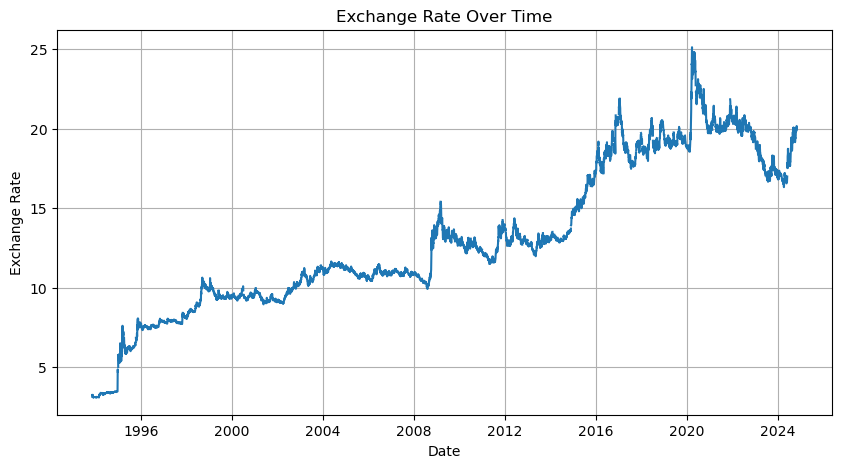

In [20]:
#Exchange Rate Over Time

plt.figure(figsize=(10, 5))
plt.plot(data.index, data['Exchange Rate'], label='Exchange Rate')
plt.title('Exchange Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.grid(True)
plt.show()


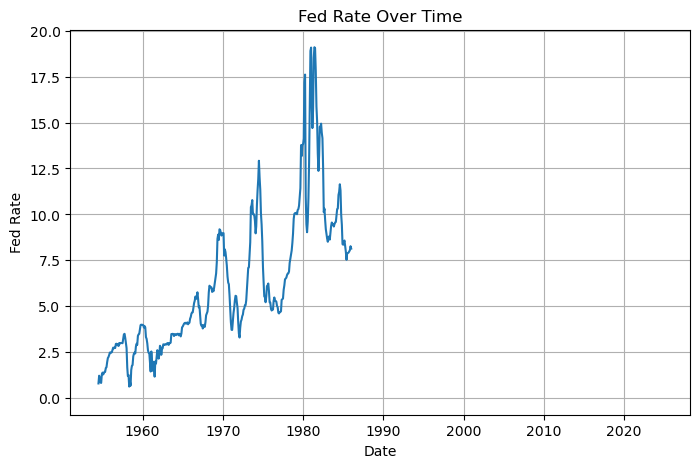

In [21]:
# Fed Rate Over Time

plt.figure(figsize=(8, 5))
plt.plot(data.index, data['Fed Rate'], label='Fed Rate')
plt.title('Fed Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Fed Rate')
plt.grid(True)
plt.show()


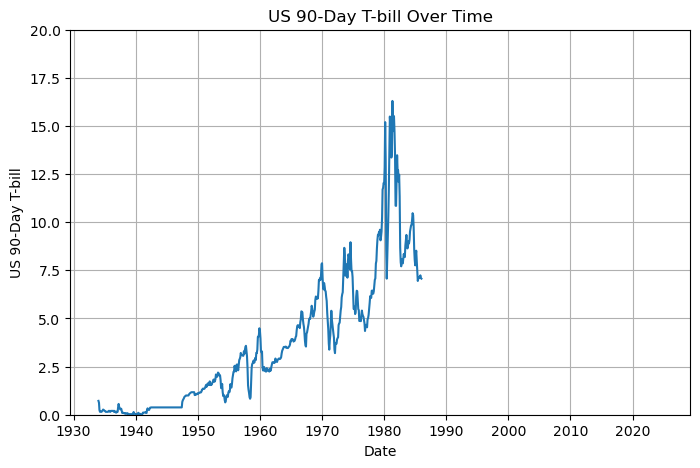

In [22]:
# US 90-Day T-bill Over Time

plt.figure(figsize=(8, 5))
plt.plot(data.index, data['US 90-Day T-bill'], label='US 90-Day T-bill')
plt.title('US 90-Day T-bill Over Time')
plt.xlabel('Date')
plt.ylabel('US 90-Day T-bill')
plt.ylim(0, 20)  # Adjusting for better visibility
plt.grid(True)
plt.show()


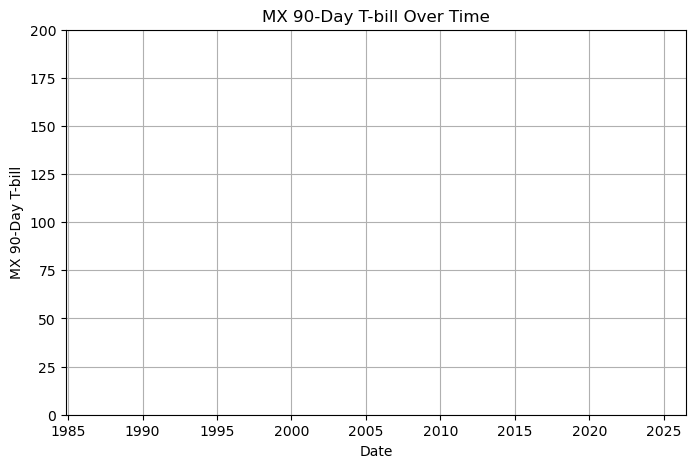

In [23]:
# MX 90-Day T-bill Over Time

plt.figure(figsize=(8, 5))
plt.plot(data.index, data['MX 90-Day T-bill'], label='MX 90-Day T-bill')
plt.title('MX 90-Day T-bill Over Time')
plt.xlabel('Date')
plt.ylabel('MX 90-Day T-bill')
plt.ylim(0, 200)  # Adjusting for better visibility
plt.grid(True)
plt.show()


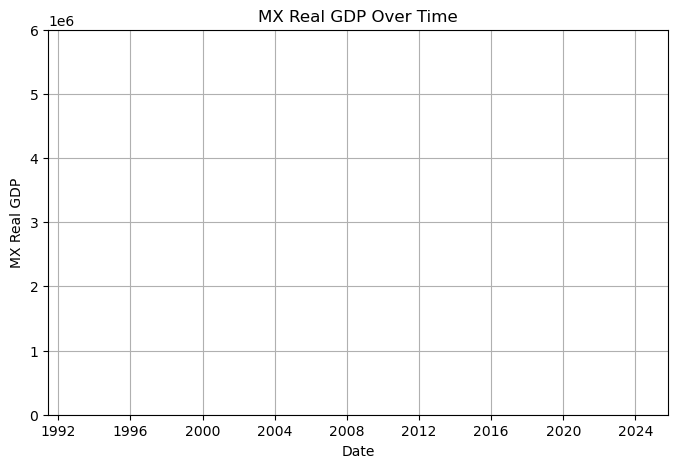

In [24]:
# MX Real GDP Over Timeplt.figure(figsize=(8, 5))
plt.figure(figsize=(8, 5))
plt.plot(data.index, data['MX Real GDP'], label='MX Real GDP')
plt.title('MX Real GDP Over Time')
plt.xlabel('Date')
plt.ylabel('MX Real GDP')
plt.ylim(0, 6e6)  # Adjusting for Mexico GDP range
plt.grid(True)
plt.show()



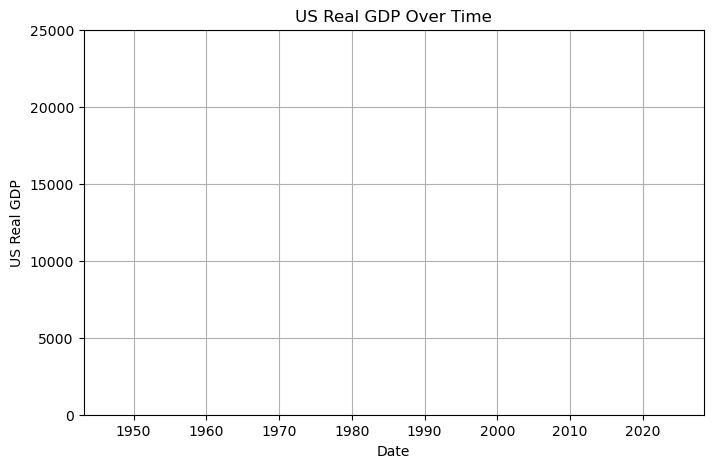

In [25]:
# US Real GDP Over Time

plt.figure(figsize=(8, 5))
plt.plot(data.index, data['US Real GDP'], label='US Real GDP')
plt.title('US Real GDP Over Time')
plt.xlabel('Date')
plt.ylabel('US Real GDP')
plt.ylim(0, 25000)  # Adjusting for better visibility
plt.grid(True)
plt.show()


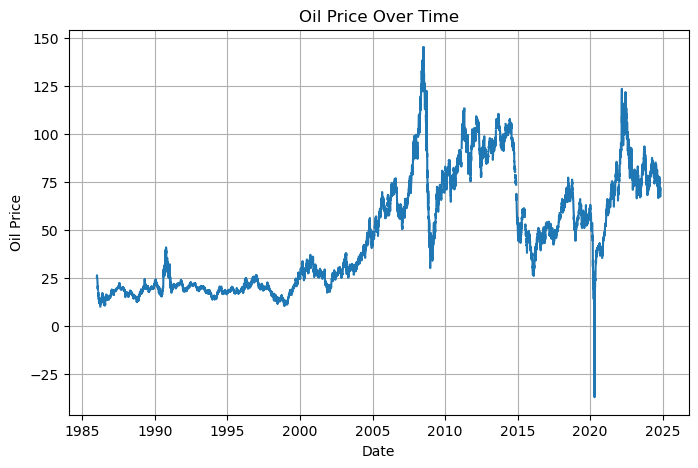

In [26]:
# Oil Price Over Time

plt.figure(figsize=(8, 5))
plt.plot(data.index, data['Oil Price'], label='Oil Price')
plt.title('Oil Price Over Time')
plt.xlabel('Date')
plt.ylabel('Oil Price')
plt.grid(True)
plt.show()


In [27]:
# Get the start and end dates for each time series in data

# Exchange rate (USD to MXN)
exchange_rate_series = fred.get_series("DEXMXUS")
print(f"The Exchange Rate start and end dates: {exchange_rate_series.index.min().strftime('%Y-%m-%d')} to {exchange_rate_series.index.max().strftime('%Y-%m-%d')}")

# US Fed Rate
fed_rate_series = fred.get_series("FEDFUNDS")
print(f"The US Fed Rate start and end dates: {fed_rate_series.index.min().strftime('%Y-%m-%d')} to {fed_rate_series.index.max().strftime('%Y-%m-%d')}")

# US 90-Day T-bill
t_bill_rate_series = fred.get_series("TB3MS")
print(f"The US 90-Day T-bill start and end dates: {t_bill_rate_series.index.min().strftime('%Y-%m-%d')} to {t_bill_rate_series.index.max().strftime('%Y-%m-%d')}")

# Mexico 90-Day T-bill
mx_t_bill_rate_series = fred.get_series("INTGSTMXM193N")
print(f"The Mexico 90-Day T-bill start and end dates: {mx_t_bill_rate_series.index.min().strftime('%Y-%m-%d')} to {mx_t_bill_rate_series.index.max().strftime('%Y-%m-%d')}")

# US Real GDP
us_gdp_series = fred.get_series("GDPC1")
print(f"The US Real GDP start and end dates: {us_gdp_series.index.min().strftime('%Y-%m-%d')} to {us_gdp_series.index.max().strftime('%Y-%m-%d')}")

# Mexico Real GDP
mx_gdp_series = fred.get_series("NGDPRSAXDCMXQ")
print(f"The Mexico Real GDP start and end dates: {mx_gdp_series.index.min().strftime('%Y-%m-%d')} to {mx_gdp_series.index.max().strftime('%Y-%m-%d')}")

# Oil Prices - West Texas Intermediate (WTI) crude oil price
oil_price_series = fred.get_series("DCOILWTICO")
print(f"The Oil Price start and end dates: {oil_price_series.index.min().strftime('%Y-%m-%d')} to {oil_price_series.index.max().strftime('%Y-%m-%d')}")




The Exchange Rate start and end dates: 1993-11-08 to 2024-11-01
The US Fed Rate start and end dates: 1954-07-01 to 2024-10-01
The US 90-Day T-bill start and end dates: 1934-01-01 to 2024-10-01
The Mexico 90-Day T-bill start and end dates: 1978-01-01 to 2024-08-01
The US Real GDP start and end dates: 1947-01-01 to 2024-07-01
The Mexico Real GDP start and end dates: 1993-01-01 to 2024-04-01
The Oil Price start and end dates: 1986-01-02 to 2024-11-04


In [28]:
# Preview data
# why above US GDP has value for 1946-01-01 but below no value for 1946-01-01
# Exchange Rate nad US on daily basis when market is opened.  Other data
# is based on different time interval (monthly, quarterly)
# Note: 1946-01-01 is default if start_date out of range.
data.tail(50)

,Exchange Rate,Fed Rate,US 90-Day T-bill,MX 90-Day T-bill,US Real GDP,MX Real GDP,Oil Price
2024-08-28,19.5288,NaN,NaN,NaN,NaN,NaN,75.49
2024-08-29,19.7880,NaN,NaN,NaN,NaN,NaN,76.90
2024-08-30,19.6576,NaN,NaN,NaN,NaN,NaN,74.52
2024-09-01,NaN,5.13,4.72,NaN,NaN,NaN,NaN
2024-09-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-09-03,19.8300,NaN,NaN,NaN,NaN,NaN,71.28
2024-09-04,19.8161,NaN,NaN,NaN,NaN,NaN,70.11
2024-09-05,19.9926,NaN,NaN,NaN,NaN,NaN,70.09
2024-09-06,20.0399,NaN,NaN,NaN,NaN,NaN,68.58
2024-09-09,19.8845,NaN,NaN,NaN,NaN,NaN,69.65


In [18]:
# Use dtpes to check data types
print(data.dtypes)
print(data.index)

Exchange Rate       float64
Fed Rate            float64
US 90-Day T-bill    float64
MX 90-Day T-bill    float64
US Real GDP         float64
MX Real GDP         float64
dtype: object
DatetimeIndex(['1934-01-01', '1934-02-01', '1934-03-01', '1934-04-01',
               '1934-05-01', '1934-06-01', '1934-07-01', '1934-08-01',
               '1934-09-01', '1934-10-01',
               ...
               '2024-10-21', '2024-10-22', '2024-10-23', '2024-10-24',
               '2024-10-25', '2024-10-28', '2024-10-29', '2024-10-30',
               '2024-10-31', '2024-11-01'],
              dtype='datetime64[ns]', length=8909, freq=None)


### Welcome.  Congratulations and latest USD to MXN foreign exchange.

### Create Foreign Exchange DataFrame from Original DataFrame

In [29]:
# Select the Date and Exchange Rate columns and store in data_fx
# Only interested in the USD to MX Peso exchange rate for now.
# Use dropna() to select dates with available Exchange Rate
# Obtain the longest time series for Exchange Rate
data_fx = data[['Exchange Rate']]
# set_index so Date prints on the x-axis when graphing.
# data_fx = data_fx.set_index('Date')
data_fx

,Exchange Rate
1934-01-01,NaN
1934-02-01,NaN
1934-03-01,NaN
1934-04-01,NaN
1934-05-01,NaN
...,...
2024-10-29,20.0000
2024-10-30,20.1720
2024-10-31,20.0314
2024-11-01,20.0273


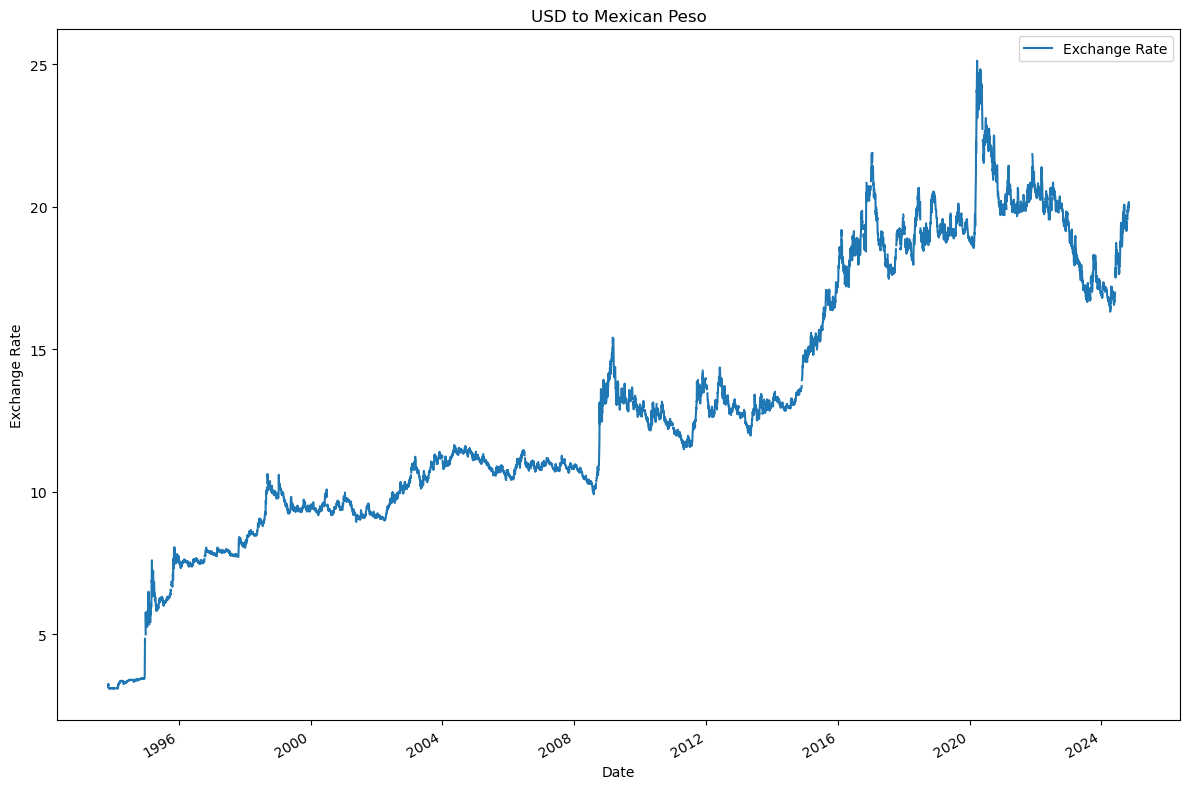

In [31]:
# Plot the Exchange Rate.  Provide title and label x and y-axis labels.
# When the USD to Peso exchange rate increases, the USD appreciates.
# When the USD to Peso exchange rate decreases, the USD depreciates.
# Note the time short time periods when USD appreciates dramaticlly.
# There is an upward trend in USD appreciation against the MXN in the
# past 30 years.

data_fx.plot(title='USD to Mexican Peso', figsize=(12, 8))
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.tight_layout()
plt.show()

### Calculate and plot regression line.

In [32]:
# Calculate the y = mx +b line in above graph.  Show calculation and plot the regression line.
# already performed: from scipy import stats and import matplotlib.pyplot as plt

# Perform linear regression
# Convert the index to a numerical format
x = data_fx.index.astype(np.int64)
y = data_fx["Exchange Rate"]
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

In [33]:
# Calculate the predicted y values
regression_line = slope * x + intercept

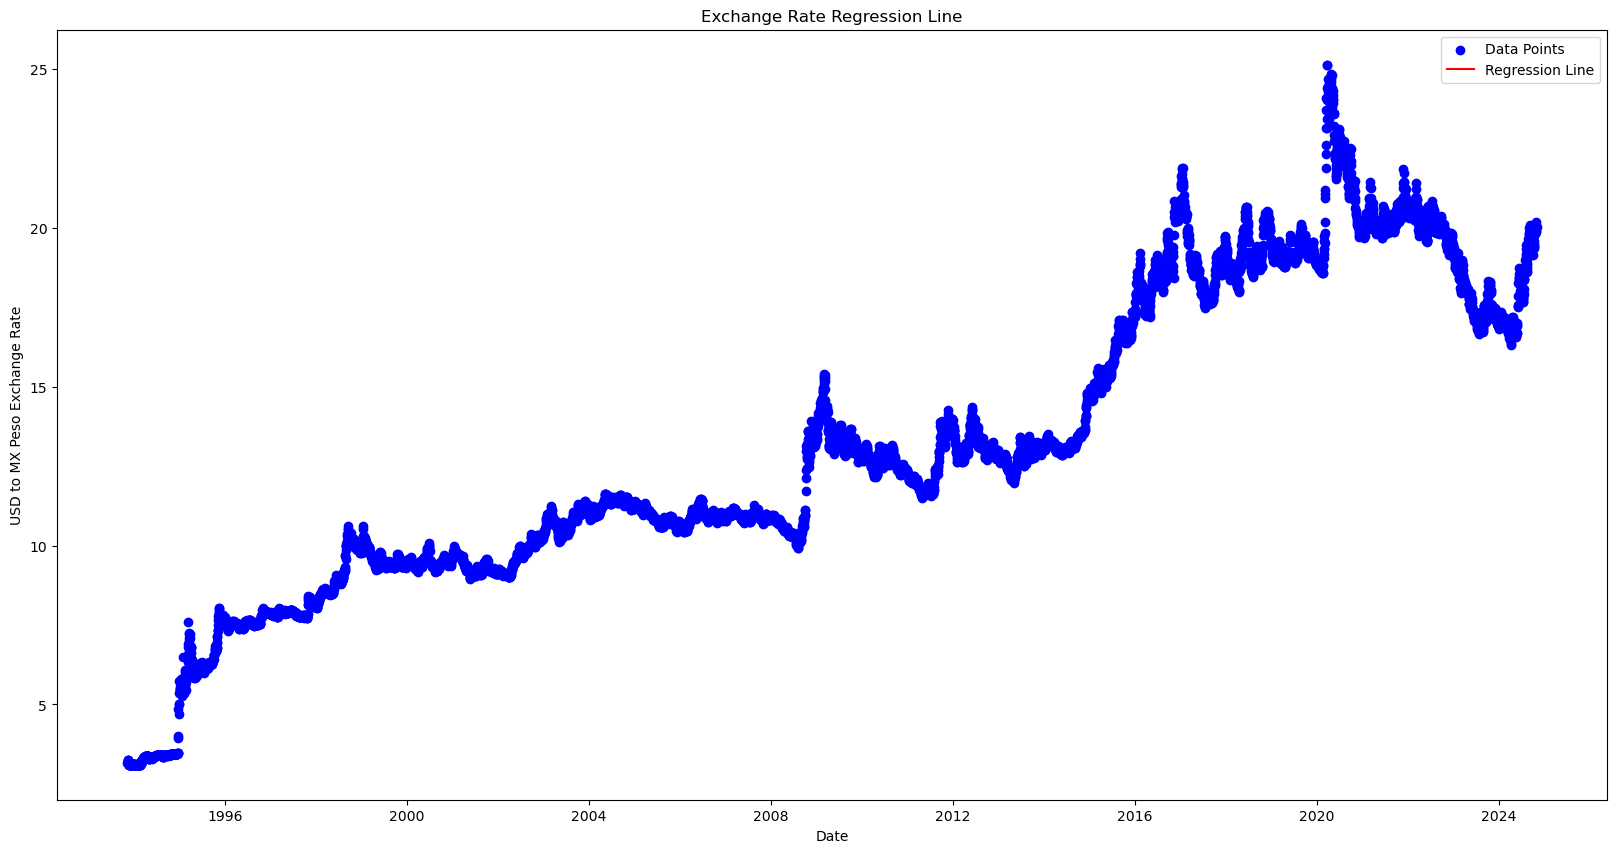

In [34]:
# Plotting
plt.figure(figsize=(20,10))
plt.scatter(data_fx.index, y, label="Data Points", color="blue")
plt.plot(data_fx.index, regression_line, color="red", label="Regression Line")
plt.xlabel("Date")
plt.ylabel("USD to MX Peso Exchange Rate")
plt.title("Exchange Rate Regression Line")
plt.legend()
plt.show()

In [ ]:
# This simple regression line is based on everything else the same.
# Convert the last day to ordinal
x_current = data_fx.index[-1].toordinal()

In [ ]:
# Calculate the x value for 90 days later
x_90_days_later = x_current + 90

In [ ]:
print(slope)
print(intercept)

1.5564957568106976e-17
-6.308584379039237


In [ ]:
# Calaculate the predicted y value (USD to MXN foreign exchange rate)
predicted_y = slope * x_90_days_later + intercept


In [ ]:
# Cannot be negataive number
print(f"Predicted value in 90 days: {predicted_y}")

Predicted value in 90 days: -6.308584379027731


### The USD is considered a safe haven during times of economic turmoil.


In [ ]:
# for loop for each row, set start_date 756 days or 3 years back.
# if data_3_year retrieves 3 years data
# need to adjust if any data is NaN
# Create the average and +/- 2 SD (standard deviation)

for row_date in data_fx.index:
    start_date = row_date - pd.DateOffset(days=756)  # Look back 756 days
    data_3_year = data_fx.loc[start_date:row_date, 'Exchange Rate']

    # why not return False or empty for the first three years
    if not data_3_year.empty:
        avg = data_3_year.mean()
        std = data_3_year.std()

        # Assign the computed values using loc
        data_fx.loc[row_date, '1_year_avg'] = avg
        data_fx.loc[row_date, '2_std_upper'] = avg + 2 * std
        data_fx.loc[row_date, '2_std_lower'] = avg - 2 * std


C:\Users\Carl\AppData\Local\Temp\ipykernel_1340\3542955160.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


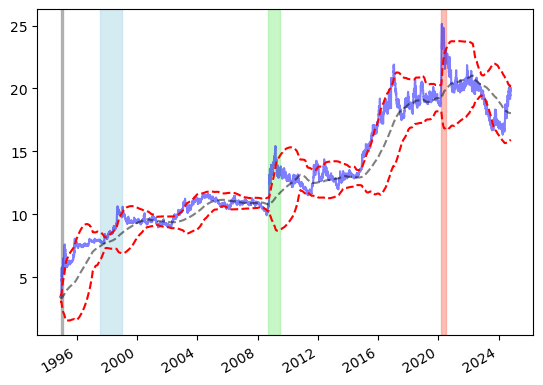

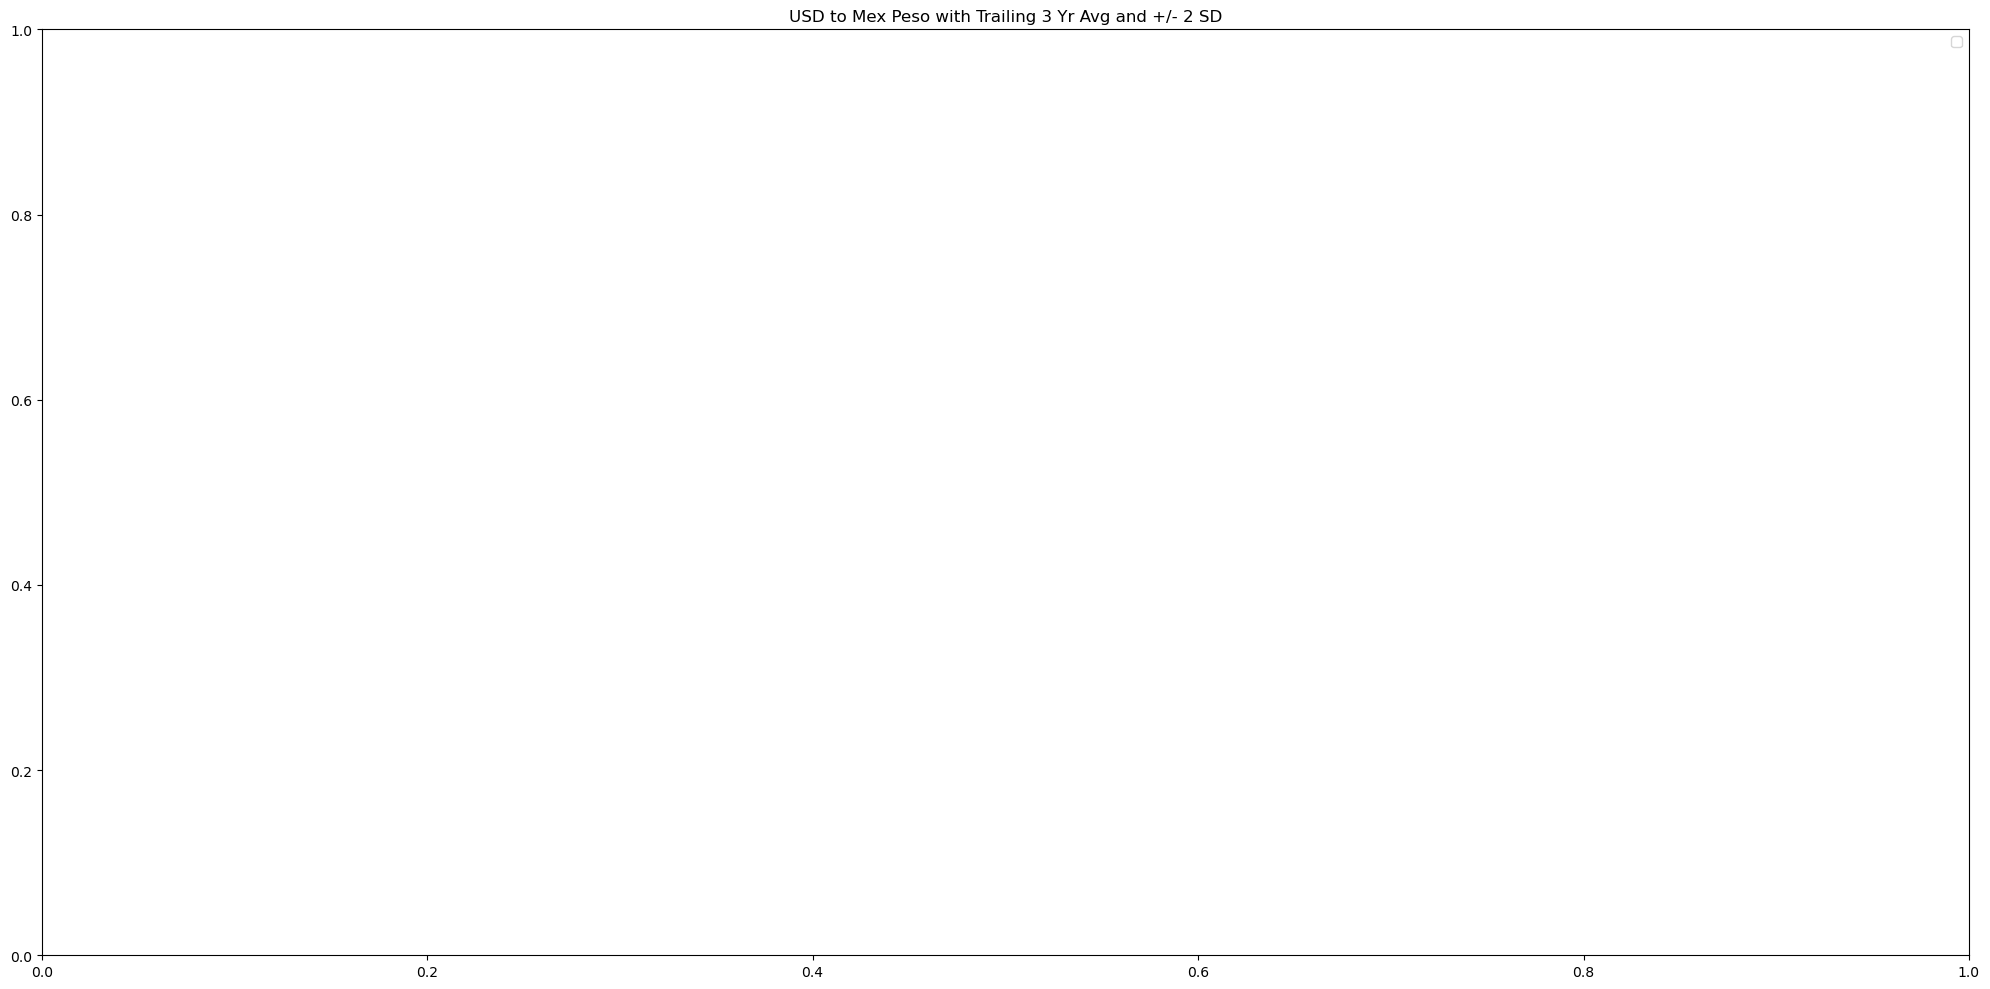

In [ ]:
# For 3 year trailing average, forward 3 years or 756 days
filtered_data = data_fx[data_fx.index >= data_fx.index[251]]

# Plotting: calculate current, 3 year moving average, and +/- 2 SD
filtered_data['Exchange Rate'].plot(label='Exchange Rate', color='blue', alpha=0.5)
filtered_data['1_year_avg'].plot(label='3 Year Avg', color='black', linestyle="--", alpha=0.5)
filtered_data['2_std_upper'].plot(label='2 Std Upper', color='red', linestyle='--')
filtered_data['2_std_lower'].plot(label='2 Std Lower', color='red', linestyle='--')

# Major economic events effecting USD to MXN exchanage rate
plt.axvspan(pd.Timestamp('1994-12-01'), pd.Timestamp('1995-01-31'), color='grey', alpha=0.5, label='Tequila Crisis')
plt.axvspan(pd.Timestamp('1997-07-01'), pd.Timestamp('1998-12-31'), color='lightblue', alpha=0.5, label='Asian Financial Crisis')
plt.axvspan(pd.Timestamp('2008-09-01'), pd.Timestamp('2009-06-30'), color='lightgreen', alpha=0.5, label='Global Financial Crisis')
plt.axvspan(pd.Timestamp('2020-03-01'), pd.Timestamp('2020-06-30'), color='salmon', alpha=0.5, label='COVID-19 Pandemic')

 # Label and plot
plt.figure(figsize=(20, 10))
plt.title('USD to Mex Peso with Trailing 3 Yr Avg and +/- 2 SD')
plt.legend()
plt.tight_layout()
plt.show()

# If all the code in one panel or cell, it works.
# How to fix this problem


### Correlation

In [ ]:

data

,Exchange Rate,Fed Rate,US 90-Day T-bill,MX 90-Day T-bill,US GDP,MX GDP
1934-01-01,NaN,NaN,0.72,NaN,NaN,NaN
1934-02-01,NaN,NaN,0.62,NaN,NaN,NaN
1934-03-01,NaN,NaN,0.24,NaN,NaN,NaN
1934-04-01,NaN,NaN,0.15,NaN,NaN,NaN
1934-05-01,NaN,NaN,0.16,NaN,NaN,NaN
...,...,...,...,...,...,...
2024-10-21,20.0494,NaN,NaN,NaN,NaN,NaN
2024-10-22,19.8992,NaN,NaN,NaN,NaN,NaN
2024-10-23,19.9284,NaN,NaN,NaN,NaN,NaN
2024-10-24,19.8520,NaN,NaN,NaN,NaN,NaN


In [ ]:
quarterly_avg = data.resample('Q').mean()
quarterly_avg

C:\Users\Carl\AppData\Local\Temp\ipykernel_1340\298446898.py:1: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarterly_avg = data.resample('Q').mean()


,Exchange Rate,Fed Rate,US 90-Day T-bill,MX 90-Day T-bill,US GDP,MX GDP
1934-03-31,NaN,NaN,0.526667,NaN,NaN,NaN
1934-06-30,NaN,NaN,0.153333,NaN,NaN,NaN
1934-09-30,NaN,NaN,0.183333,NaN,NaN,NaN
1934-12-31,NaN,NaN,0.250000,NaN,NaN,NaN
1935-03-31,NaN,NaN,0.180000,NaN,NaN,NaN
...,...,...,...,...,...,...
2023-12-31,17.545556,5.330000,5.283333,11.060000,22960.600,6300104.5
2024-03-31,16.983616,5.330000,5.233333,11.120000,23053.545,6306870.5
2024-06-30,17.222032,5.330000,5.243333,10.976667,23223.906,6316702.0
2024-09-30,18.924516,5.263333,4.990000,10.840000,23386.248,NaN


In [ ]:
quarterly_avg.dropna(inplace=True)
quarterly_avg

,Exchange Rate,Fed Rate,US 90-Day T-bill,MX 90-Day T-bill,US GDP,MX GDP
1993-12-31,3.123720,2.990000,3.060000,13.096667,10833.987,3513104.5
1994-03-31,3.182411,3.213333,3.243333,9.900000,10939.116,3548062.0
1994-06-30,3.345166,3.940000,3.986667,16.110000,11087.361,3628977.5
1994-09-30,3.395023,4.486667,4.476667,15.096667,11152.176,3649230.5
1994-12-31,3.618785,5.166667,5.280000,15.283333,11279.932,3688503.5
...,...,...,...,...,...,...
2023-06-30,17.689335,4.990000,5.073333,11.256667,22539.418,6257248.0
2023-09-30,17.054851,5.260000,5.290000,11.153333,22780.933,6303922.5
2023-12-31,17.545556,5.330000,5.283333,11.060000,22960.600,6300104.5
2024-03-31,16.983616,5.330000,5.233333,11.120000,23053.545,6306870.5


In [ ]:
correlation_matrix = quarterly_avg.corr()
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

print(correlation_matrix)

                  Exchange Rate  Fed Rate  US 90-Day T-bill  MX 90-Day T-bill    US GDP    MX GDP
Exchange Rate          1.000000 -0.529343         -0.506422         -0.508896  0.929682  0.898167
Fed Rate              -0.529343  1.000000          0.994867          0.691894 -0.474324 -0.508572
US 90-Day T-bill      -0.506422  0.994867          1.000000          0.686479 -0.448420 -0.488908
MX 90-Day T-bill      -0.508896  0.691894          0.686479          1.000000 -0.593637 -0.653261
US GDP                 0.929682 -0.474324         -0.448420         -0.593637  1.000000  0.976914
MX GDP                 0.898167 -0.508572         -0.488908         -0.653261  0.976914  1.000000


### Interest Rate Parity (IRP). F = S x (1 + i US)/(1 + i MX).  
##### F is forward exchange rate, S is spot exchange rate (current), i US
##### is US 90 day T-bill and i MX is Mexico 90 day T-bill.
##### Example: F = 18 x (1.02) / (1.05) = 17.78
##### Everything else the same, the USD will depreciate vs MXN.

In [ ]:
# Calculate the forward exchange rate out 90 days and compare to actual
# exchange rate.

In [ ]:
# Run a correlation to see if IRP is a good predictor of future exchange rate.

### Prophet